In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
import warnings

from src import paths, plotting, labels

plt.style.use('ggplot')
%matplotlib inline

!date -I

2024-05-13


In [30]:
ONLY_LEFT_HEMISPHERE = False

In [31]:
fig_dir = f"pytepfit_ftract_comparison_results_200ms/{'only_left/' if ONLY_LEFT_HEMISPHERE else ''}"
%mkdir -p  {paths.path_figures(fig_dir)}

In [32]:
ftract_probabilities = pd.read_csv(paths.path('interim/response_probability_and_communication_metrics_M1_FTRACT_ED0_long.csv')).set_index('label')
ftract_probabilities

,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF
label,,,,,,,,,,,
L_V1,NaN,86.733295,0.0,inf,0.010308,0.004043,0.000262,inf,17.289716,0.005749,0.002776
L_MST,NaN,66.763480,0.0,inf,0.010650,0.005580,0.000383,inf,12.452376,0.008141,0.001962
L_V6,NaN,82.434470,0.0,inf,0.010378,0.003974,0.000197,inf,17.181117,0.005880,0.002461
L_V2,NaN,82.496483,0.0,inf,0.009055,0.004073,0.000247,inf,12.868701,0.006706,0.002764
L_V3,NaN,85.616660,0.0,inf,0.009372,0.004269,0.000183,inf,19.851451,0.007832,0.002849
...,...,...,...,...,...,...,...,...,...,...,...
R_STSva,NaN,82.234737,0.0,inf,0.008525,0.006676,0.000528,inf,21.029001,0.007312,0.001664
R_TE1m,NaN,89.386577,0.0,inf,0.008245,0.005509,0.001009,inf,13.976153,0.007279,0.002676
R_PI,NaN,76.150192,0.0,inf,0.008098,0.005653,0.000498,inf,20.653869,0.007442,0.001153


In [33]:
pytepfit_AUC = pd.read_csv(paths.path('interim/pyTepFit_empirical/response_AUC_and_communication_metrics_M1_pyTepFit_200ms_thr8.csv')).set_index('label')
pytepfit_AUC.index = pytepfit_AUC.index.map(lambda x: x[:-3])
pytepfit_AUC

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,NaN
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,3429.233902
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,899.571678
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,795.702728
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,NaN
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,NaN
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,NaN


In [34]:
mapping_schaefer_schaefer = pd.read_csv(paths.path(f'external/schaefer_parcellation_centroids/ROI_MAPPING_pytepfit.csv'),index_col=0)
pytepfit_AUC = pd.merge(pytepfit_AUC,mapping_schaefer_schaefer,left_on="label",right_on='roi_name')
pytepfit_AUC[["response","ED","roi_name","roi_name_csv"]]

,response,ED,roi_name,roi_name_csv
0,NaN,45.307805,7Networks_LH_Cont_Cing_1,7Networks_LH_Cont_Cing_1
1,3429.233902,56.289608,7Networks_LH_Cont_Cing_2,7Networks_LH_Cont_Cing_2
2,899.571678,92.766248,7Networks_LH_Cont_PFCl_1,7Networks_LH_Cont_OFC_1
3,795.702728,94.172221,7Networks_LH_Cont_PFCl_2,7Networks_LH_Cont_PFCl_1
4,NaN,92.564602,7Networks_LH_Cont_PFCl_3,7Networks_LH_Cont_PFCl_2
...,...,...,...,...
195,NaN,115.547602,7Networks_RH_Vis_5,7Networks_RH_Vis_5
196,NaN,105.548873,7Networks_RH_Vis_6,7Networks_RH_Vis_6
197,NaN,90.633878,7Networks_RH_Vis_7,7Networks_RH_Vis_7
198,NaN,114.749213,7Networks_RH_Vis_8,7Networks_RH_Vis_8


In [35]:
mapping = pd.read_csv(paths.path('interim/DICE_Glasser_Yeo17_Schaefer200_labelMapping.csv'),index_col=0)
mapping = mapping[["regionName","Yeo17","Schaefer200","regionLongName"]]
mapping

,regionName,Yeo17,Schaefer200,regionLongName
0,V1_L,2_Visual_B,7Networks_LH_Vis_10,Primary_Visual_Cortex_L
1,V6_L,2_Visual_B,7Networks_LH_Vis_12,Sixth_Visual_Area_L
2,V2_L,2_Visual_B,7Networks_LH_Vis_13,Second_Visual_Area_L
3,V3_L,1_Visual_A,7Networks_LH_Vis_13,Third_Visual_Area_L
4,V4_L,1_Visual_A,7Networks_LH_Vis_2,Fourth_Visual_Area_L
...,...,...,...,...
355,FOP2_R,4_Somatomotor_B,7Networks_RH_SomMot_3,Frontal_Opercular_Area_2_R
356,PoI1_R,7_Dorsal_Attention_B,7Networks_RH_SalVentAttn_FrOperIns_2,Area_Posterior_Insular_1_R
357,Ig_R,4_Somatomotor_B,7Networks_RH_SomMot_3,Insular_Granular_Complex_R
358,FOP5_R,8_Salience+Ventral_Attention_A,7Networks_RH_SalVentAttn_FrOperIns_3,Area_Frontal_Opercular_5_R


In [36]:
def reorder_label(x):
    if x[0] == 'L':
        return x[2:]+"_L"
    else:
        return x[2:]+"_R"

ftract_probabilities.index = ftract_probabilities.index.map(reorder_label)

In [37]:
set(ftract_probabilities.index) == set(mapping["regionName"])

True

In [38]:
merged_ftract_dice = pd.merge(mapping,ftract_probabilities,left_on="regionName",right_on="label")
merged_all = pd.merge(merged_ftract_dice,pytepfit_AUC,left_on="Schaefer200",right_on="roi_name_csv",suffixes=["","_pytepfit"])
merged_all = merged_all[["regionName","Yeo17","Schaefer200","response","ED","response_pytepfit","ED_pytepfit"]]
merged_all

,regionName,Yeo17,Schaefer200,response,ED,response_pytepfit,ED_pytepfit
0,V1_L,2_Visual_B,7Networks_LH_Vis_10,NaN,86.733295,NaN,72.797625
1,V6_L,2_Visual_B,7Networks_LH_Vis_12,NaN,82.434470,1007.341918,66.509935
2,DVT_L,2_Visual_B,7Networks_LH_Vis_12,0.092,58.361704,1007.341918,66.509935
3,V2_L,2_Visual_B,7Networks_LH_Vis_13,NaN,82.496483,NaN,75.506400
4,V3_L,1_Visual_A,7Networks_LH_Vis_13,NaN,85.616660,NaN,75.506400
...,...,...,...,...,...,...,...
355,Pir_R,7_Dorsal_Attention_B,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,65.957407,675.235625,114.855410
356,PI_R,7_Dorsal_Attention_B,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,76.150192,675.235625,114.855410
357,AVI_R,8_Salience+Ventral_Attention_A,7Networks_RH_Cont_PFCv_1,NaN,75.247200,NaN,107.794967
358,AAIC_R,8_Salience+Ventral_Attention_A,7Networks_RH_Cont_PFCv_1,NaN,58.448530,NaN,107.794967


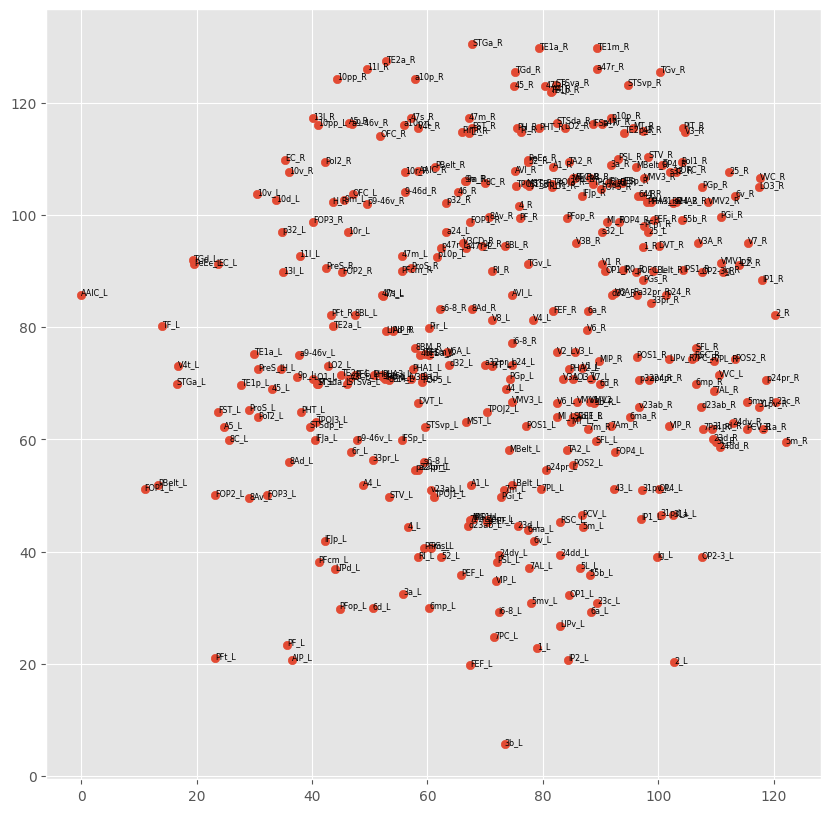

In [39]:
def minmax_norm(x):
    return (x - np.nanmin(x)) / (np.nanmax(x)-np.nanmin(x))

def plot_two_columns(df,col1,col2,label,normalize=True):
    if normalize:
        a1 = minmax_norm(np.array(df[col1]))
        a2 = minmax_norm(np.array(df[col2]))
    else:
        a1 = np.array(df[col1])
        a2 = np.array(df[col2])
        
    plt.style.use('ggplot')
    fig,ax = plt.subplots(figsize=(10,10))
    ax.scatter(a1,a2)

    for i, coor in enumerate(zip(a1,a2)):
        x,y = coor
        if np.isnan(x) or np.isnan(y):
            continue

        ax.text(x,y,df[label][i],fontsize='xx-small')

plot_two_columns(merged_all,"ED","ED_pytepfit","regionName",normalize=False)
#plt.gca().set_aspect('equal')
plt.show()